![image](https://cdn.abcotvs.com/dip/images/5041026_010919-wabc-ap-nyc-schoolbus-img.jpg?w=1600)

Author: David Rodrigues
https://www.linkedin.com/in/davidrodrigues/
*November, 2020*

# **The Relationship Between Students Academic Performance and Demographic Factors: An Analysis of New York City Public Schools and Student Profile**

The objective of this project is to explore relationships between SAT scores and demographic factors in New York City public schools. SAT, or Scholastic Aptitude Test, is a test that high school seniors in the U.S. take every year. The SAT has three sections, each of which is worth a maximum of 800 points. Colleges use the SAT to determine which students to admit. High average SAT scores are usually indicative of a good school.

New York City has published data on student SAT scores by high school, along with additional demographic data sets. We will work with 8 different datasets:
- sat_results.csv - Data on [SAT scores](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4)
- demographics.csv - Data on [demographics](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j)
- class_size.csv - Data on [class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3)
- graduation.csv - Data on [graduation outcomes](https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a)
- ap_2010.csv - Data on [AP test results](https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e)
- hs_directory.csv - A directory of [high schools](https://data.cityofnewyork.us/Education/2014-2015-DOE-High-School-Directory/n3p6-zve2)
- survey_all.txt - Data on [surveys](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) from all schools
- survey_d75.txt - Data on surveys from New York City [district 75](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8)

## Reading and Cleaning the Data
Let's start by reading these datasets into Pandas and storing them in a dictionary, in which the keys are the names of each file without the termination ".csv". For now, we will start by reading only the csv files. The txt files will be read later.

In [1]:
import pandas as pd
# create a list of files
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

# create a dictionary called data
data = {}
import re
for file in data_files:
    path = file
    key = re.findall(r"(\w+).csv", file)
    key = key[0]
    value = pd.read_csv(path)
    value_name = key + "_df"
    value_name = value
    data[key]=value

In [2]:
# display the first five rows of the SAT scores data
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


From the SAT results output above, we can see that the `DBN` column seems to be the unique identifier for each school. We also have an only row for each `DBN`. It seems the dataset contains only high schools. Lets continue exploring the other datasets.

In [3]:
# display the first five rows of each of the other datasets
for key in data:
    df = data[key]
    print(key)
    print("\n")
    print(df.head())

ap_2010


      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN  
class_size


   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Rober

As we can see in the results above, all datasets seem to include the column `DBN`, or at least the variables needed to obtain its code. Some files have multiple rows per school, we will probably need to condense them. Let's now read the two text files.

In [4]:
# read the two text files 
all_survey = pd.read_csv("survey_all.txt", sep='\t', encoding='windows-1252')

d75_survey = pd.read_csv('survey_d75.txt', sep='\t', encoding='windows-1252')

# combine the two text files in one dataset called survey
survey = pd.concat([all_survey, d75_survey], axis=0, sort=False)
print(survey.head())
print("\n")
print(survey.shape)

      dbn    bn                      schoolname  d75 studentssurveyed  \
0  01M015  M015       P.S. 015 Roberto Clemente    0               No   
1  01M019  M019             P.S. 019 Asher Levy    0               No   
2  01M020  M020            P.S. 020 Anna Silver    0               No   
3  01M034  M034  P.S. 034 Franklin D. Roosevelt    0              Yes   
4  01M063  M063       P.S. 063 William McKinley    0               No   

   highschool                  schooltype  rr_s  rr_t  rr_p  ...  s_q14_2  \
0         0.0           Elementary School   NaN    88    60  ...      NaN   
1         0.0           Elementary School   NaN   100    60  ...      NaN   
2         0.0           Elementary School   NaN    88    73  ...      NaN   
3         0.0  Elementary / Middle School  89.0    73    50  ...      NaN   
4         0.0           Elementary School   NaN   100    60  ...      NaN   

   s_q14_3  s_q14_4  s_q14_5  s_q14_6  s_q14_7  s_q14_8  s_q14_9  s_q14_10  \
0      NaN      NaN 

There are more than 2,000 columns in the `survey` dataset. Most probably we will not need to use them all. The dataframe includes a `dbn` column we will want to convert to uppercase. A dictionary with the meaning of each column of the `survey` dataset can be found [here](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8). Based on this dictionary, we will select the relevant columns for analysis.

In [5]:
# convert dbn into DBN 
survey['DBN']=survey['dbn']

# select the relevant columns
survey = survey[["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", 
                 "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", 
                 "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", 
                 "eng_tot_11", "aca_tot_11"]]

# assing the dataframe back to the dictionary in which we are storing all datasets
data['survey'] = survey

data['survey'].shape

(1702, 23)

Analyzing the datasets, we see that `hs_directory` has a column called `dbn`. We will convert it into `DBN`. 

The `class_size` dataframe has two different columns we will combine to obtain the `DBN` code. The `CSD` and the `SCHOOL CODE` columns together will produce the `DBN` code we need. We will only need to add a leading `0` for the `CSD` codes with only one digit, since all `DBN` codes have double digits.

In [6]:
# change dbn into DBN in the hs_directory column
data['hs_directory']['DBN']=data['hs_directory']['dbn']

# combine CSD and SCHOOL CODE columns to obtain the DBN code in class_size
'''create a function to pad the csd function in two digits'''
def pad_csd_col(item):
    item_str = str(item)
    if len(item_str)==1:
        return '0' + item_str
    else:
        return item_str

# apply the function to CSD to obtain two digit numbers
data['class_size']['padded_csd'] = data["class_size"]["CSD"].apply(pad_csd_col)

# combine padded_csd and school code to obtain the DBN
data['class_size']['DBN'] = data['class_size']['padded_csd']+data['class_size']['SCHOOL CODE']

data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


We will also need to modify the `sat_results` dataframe. We will start by converting the columns with test scores into numeric, and then combine all different SAT scores into one column called `sat_scores`.

In [7]:
# convert the SAT score columns in sat_results into numeric
string_cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']

for col in string_cols:
    data['sat_results'][col] = pd.to_numeric(data['sat_results'][col], errors='coerce')

In [8]:
# create a new column sat_score which will be the sum of the columns math, reading and writting scores
data['sat_results']['sat_score'] = data['sat_results'][string_cols[0]] + data['sat_results'][string_cols[1]] + data['sat_results'][string_cols[2]]

data['sat_results']['sat_score'].head()

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64

Next, we will extract the latitude and longitude coordinates for each school. This will enable us to map the schools and uncover any geographic patterns in the data. The coordinates are currently in the text field `Location 1` in the `hs_directory` data set. We will need to extract the coordinates in parenthesis. Taken together, latitude and longitude make up a pair of coordinates that allows us to pinpoint any location on Earth.

In [9]:
# import the regular expression module
import re

# create a function that will take a string, extract the coordinates from the string, split
# latitude and longitude, select only latitude, remove unnecessary signs like parenthesis and brackets
def ext_lat(string):
    coords = re.findall('\(.+\)', string)
    str_coords = str(coords)
    coord_list = str_coords.split(',')
    lat = coord_list[0]
    lat_clean = (lat.replace('[', '')
                 .replace('(', '')
                 .replace("'", '')
                )
    return lat_clean

# apply the function to the column Location 1 and assign the result to the new column lat
data['hs_directory']['lat'] = data['hs_directory']['Location 1'].apply(ext_lat)

data['hs_directory']['lat'].head()

0    40.601989336
1    40.593593811
2    40.692133704
3    40.822303765
4    40.773670507
Name: lat, dtype: object

In [10]:
# below we do the same for longitude, to create anoter column called lon
import re

'''create a function to extract longitude'''
def ext_lon(string):
    coord = re.findall("\(.+\)", string)
    coord = str(coord)
    coord = coord.split(',')
    lon = coord[1]
    lon = (lon.replace(')', '')
           .replace(']', '')
           .replace("'", '')
          )
    return lon

# apply the function to the column Location 1 and assign the result to the new column lon
data['hs_directory']['lon'] = data['hs_directory']['Location 1'].apply(ext_lon)

cols = ['lat', 'lon']

# convert both the lat and lon new columns into numeric
for col in cols:
    data['hs_directory'][col] = pd.to_numeric(data['hs_directory'][col], errors='coerce')

# display the first rows of hs_directory with the two new lat and lon columns
data['hs_directory'].head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,DBN,lat,lon
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,"8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(4...",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,27Q260,40.601989,-73.762834
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,"2630 Benson Avenue\nBrooklyn, NY 11214\n(40.59...",13.0,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,21K559,40.593594,-73.984729
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,"1014 Lafayette Avenue\nBrooklyn, NY 11221\n(40...",3.0,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,16K393,40.692134,-73.931503
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,"1980 Lafayette Avenue\nBronx, NY 10473\n(40.82...",9.0,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,08X305,40.822304,-73.855961
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,"100 Amsterdam Avenue\nNew York, NY 10023\n(40....",7.0,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,03M485,40.773671,-73.985269


Some of the datasets, as `class_size`, have multiple rows with the same `DBN`. This would create problems since we want to use `DBN` to combine the multiple files. We will condense the `class_size` data to obtain a dataset with only one `DBN`per row.

If we consider the `GRADE`column in `class_size`, it includes multiple values. Considering that we are only focused on high schools, we will consider only the values 9-12.

We also have different `PROGRA TYPE` values. Let's consider only the value`GEN ED`, which is the largest one.

In [11]:
# assign the class_size dataset into a dataframe called class_size
class_size = data["class_size"]

# filter class_size only for rows where GRADE is 9-12
class_size = class_size[class_size['GRADE ']=='09-12']

# filter class_size only for rows where PROGRAM TYPE is GEN ED
class_size = class_size[class_size['PROGRAM TYPE']=='GEN ED']

We still have multiple columns with the same `DBN` values in the `class_size` dataframe. This is mainly due to the `CORE COURSE` and `CORE SUBJECT` columns. What we will do is to combine all rows with the same `DBN` values and calculate the mean for each column.

In [12]:
# group the class_size dataset by the DBN column
import numpy
class_size = class_size.groupby(by=['DBN']).mean()

# reset the index to make the DBN a column not an index
class_size.reset_index(inplace=True)

# assing the class_size dataframe back to the original dictionary in which we are storing the datasets
data['class_size'] = class_size

data['class_size'].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


Now we see that there is finally only one row for each `DBN` in the `class_size` dataset. Next, we will condense also the `demographics` dataframe. In this case, the only column preventing `DBN` from being unique is `schoolyear`. Let's filter the `demographics` dataframe only for `schoolyear`values of `20112012`, that is, the most recent data.

In [13]:
# filter the demographics dataset only for rows shoolyear is 20112012
data["demographics"] = data["demographics"][data["demographics"]['schoolyear']==20112012]

data["demographics"].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


Now, let's condense the `graduation`dataset. The `Demographic` and `Cohort` columns are the ones preventing `DBN` from being unique. Let's filter the data from the most recent cohort, `2016`. We also want data from the full cohort, so let's also select rows where `Demographic` is `Total Cohort`.

In [14]:
# assign the graduation dataset into a dataframe with the same name
graduation = data["graduation"]

# filter rows in which the Cohort column is 2006
graduation = graduation[graduation['Cohort']=='2006']

# filter rows in which the Demographic column is Total Cohort
graduation = graduation[graduation['Demographic']=='Total Cohort']

# assign the dataframe back to the dictionary
data["graduation"]=graduation

# display the first rows of the cleaned graduation data
data["graduation"].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7,42,33.9,79.2,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8,67,74.4,95.7,...,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56.0,40,47.6,85.1,...,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4,91,47.2,86.7,...,22,11.4,21.0,14,7.3,13.3,53,27.5,35,18.1


Next, we will need to clean the `ap_2010` dataframe. We will start by conveting the AP test results into numeric.

In [15]:
# create a list with the columns we want to convert into numeric
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

# convert all of these columns into numeric
for col in cols:
    data['ap_2010'][col] = pd.to_numeric(data['ap_2010'][col], errors='coerce')

# display the data type of the same columns   
data['ap_2010'][['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']].dtypes

AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

## Merging the Multiple Datasets into One Combined Dataframe
Now that we have our data clean and all dataframes have a `DBN` column, with only one row per value, we are ready to merge the different datasets into a combined dataframe. Let's start by merging our most important dataset `sat_results` into `ap_2010`, and then into `graduation`.

In [16]:
# assign sat_results inside the dictionary to a dataframe called combined
combined = data['sat_results']

# merge combined and ap_2010
combined = combined.merge(data['ap_2010'], how='left', on='DBN')

# merge the resulting dataset and graduation
combined = combined.merge(data['graduation'], how='left', on='DBN')

combined.shape

(479, 33)

Now we still have to merge `combined` into `class_size`, `demographics`, `survey`, and `hs_directory`. Because these files contain information that is more valuable to our analysis, and also have fewer missing `DBN` values, we'll use the inner join type.

In [17]:
# create a list with the datasets we want to merge into combined
cols = ['class_size', 'demographics', 'survey', 'hs_directory']

# merge each of the dataframes into combined
for col in cols:
    combined = combined.merge(data[col], how='inner', on='DBN')

# display the first few rows and the shape of the combined dataset
print(combined.head())
print(combined.shape)

      DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                     44                            390.0   
4                    159                            522.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3   

## Dealing with Missing Values
Our resulting dataframe has many missing values. Next, we will handle the missing data. We will fill missing values with the mean of each column. In cases all values in a respective column are null, the mean cannot be calculated and will be filled with zeros. 

In [18]:
# calculate the mean of each column in the combined dataset
means = combined.mean(axis=0)

# fill all missing values with the average of each column
combined = combined.fillna(means)

# for the remaining null values that were still showing, we will fill them with zeros
combined = combined.fillna(0)

# display the first rows of the new clean combined dataframe
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.0,1.0,3001.0,1004323.0,1.003540e+09,Chinatown ...,40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.0,2.0,2201.0,1004070.0,1.003350e+09,Lower East Side ...,40.718725,-73.979426


We can see in the data above that there are no missing values anymore. Besides, there are some columns with all values equal to zero. Now, we have clean data in the combined dataset to start our analysis.

Mapping the statistics out on a school district level might be an interesting way to analyze the data. Adding a column to the data set that specifies the school district will help us accomplish this.

The school district is just the first two characters of `DBN`. Let's create a new column with the district of each school.

In [19]:
'''create a function to extract the first two digits of DBN'''
def first_two(string):
    return string[0:2]

# apply the function to DBN to obtain the school district information
combined['school_dist'] = combined['DBN'].apply(first_two)

# display the first few rows of the school district new column
combined['school_dist'].head()

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

## Analyzing the Data
Next, we will start doing basic exploratory analysis to identify which columns are more correlated.

### Correlations

In [20]:
# calculate correlations among the columns in combined
correlations = combined.corr()

# filter only the sat_score column in the resulting correlations dataframe
correlations = correlations['sat_score']

# display the correlations with the sat_score column
print(correlations)

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
Total Grads - % of cohort               0.584234
Total Regents - % of cohort             0.667603
Total Regents - % of grads              0.494732
Advanced Regents - % of cohort          0.771566
Advanced Regents - % of grads           0.739927
Regents w/o Advanced - % of cohort     -0.138188
Regents w/o Advanced - % of grads      -0.456213
Local - % of cohort                    -0.467951
Local - % of grads                     -0.494732
Still Enrolled - % of cohort           -0.491914
Dropped Out - % of cohort              -0.458537
CSD                                     0.042948
NUMBER OF STUDENTS /

As we can see above, unsurprisingly the three different SAT results are correlated. Total enrollment seems also to be correlated with SAT score, which is counter intuitive (larges schools with better results). The number of female students tends to be correlated with better test scores. School safety metrics also correlate with test results. 

We observe big differences depending on students race. Still, the percentage of students that are English learners correlates negatively with SAT results. 

Let's create a scatter plot of `total_enrollment` and `sat_scores` to check on how much they seem related.

### Total Enrollment and SAT Score

In [21]:
# import matplotlib
import matplotlib.pyplot as plt

# create a scatterplot of total_enrollment and sat_score
combined.plot(kind='scatter', x='total_enrollment', y='sat_score', figsize=(8,6))
plt.xlabel('Total Enrollment', fontsize=12)
plt.ylabel('SAT Score', fontsize=12)
plt.show()

<Figure size 800x600 with 1 Axes>

Despite of the fact that total enrollment and SAT scores are correlated, the scatter plot shows that the relationship between the two variables is not so clear. For example, if we take only small schoold (low total enrollment), there is a wide range of SAT score values. On the other hand, there is a concentration of schools with low enrollment and also low SAT scores. Let's explore tham further.

In [22]:
# filter combined to include only the rows in which total enrollment and sat_score are both below 1000
low_enrollment = combined[(combined['total_enrollment']<1000) & (combined['sat_score']<1000)]

# display the school names of the filtered dataset
print(low_enrollment['School Name'].value_counts())

0                                        2
MULTICULTURAL HIGH SCHOOL                1
BROOKLYN INTERNATIONAL HIGH SCHOOL       1
BRONX INTERNATIONAL HIGH SCHOOL          1
INTERNATIONAL SCHOOL FOR LIBERAL ARTS    1
INTERNATIONAL HIGH SCHOOL AT PROSPECT    1
HIGH SCHOOL OF WORLD CULTURES            1
PAN AMERICAN INTERNATIONAL HIGH SCHOO    1
KINGSBRIDGE INTERNATIONAL HIGH SCHOOL    1
INTERNATIONAL COMMUNITY HIGH SCHOOL      1
IT TAKES A VILLAGE ACADEMY               1
Name: School Name, dtype: int64


Our analysis above reveals that most of the high schools with low total enrollment and low SAT scores have high percentages of English language learners. This indicates that it's actually `ell_percent` that seems to correlate with `sat_score`, rather than `total_enrollment`. To explore this relationship further, let's plot out `ell_percent` against `sat_score`.

### English Learners Percent (ell_percent) and SAT Score

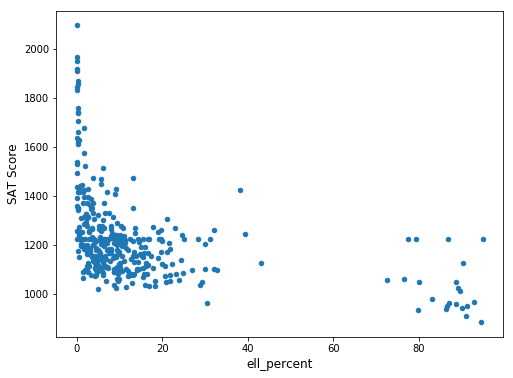

In [23]:
# plot ell_percent and sat_score
combined.plot(kind='scatter', x='ell_percent', y='sat_score', figsize=(8,6))
plt.xlabel('ell_percent', fontsize=12)
plt.ylabel('SAT Score', fontsize=12)
plt.show()

Again, English Learners (ell_percent) and SAT scores does not show a clear relationship either. What we can see is that for schools with a high percentage of English learners (80% of higher), SAT scores tend to be very low. However, this seems to be specific to schools with a high percentage of English learners.

Maybe the relatonships are hard to describe since the data is too much granular. Let's group the data by district to check if the relationships are clearer.

In [24]:
# group the data by district calculating the mean by each of the rows
import numpy as np
districts = combined.groupby(by=['school_dist']).agg(np.mean)

# reset the index to make the school_dist a column and not and index
districts.reset_index(inplace=True)

# display the first rows of the grouped dataframe
districts.head()

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,Total Grads - % of cohort,...,priority08,priority09,priority10,Community Board,Council District,Census Tract,BIN,BBL,lat,lon
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,71.333333,...,0.0,0.0,0.0,3.000000,1.500000,1106.833333,1.004144e+06,1.003302e+09,40.719022,-73.982377
1,02,426.619092,444.186256,424.832836,1295.638184,128.908454,201.516827,157.495833,158.647849,75.453574,...,0.0,0.0,0.0,4.204005,2.963296,1132.479744,1.103862e+06,1.070438e+09,40.739699,-73.991386
2,03,428.529851,437.997512,426.915672,1293.443035,156.183494,244.522436,193.087500,183.384409,74.029937,...,0.0,0.0,0.0,7.500000,6.500000,166.666667,1.034931e+06,1.012833e+09,40.781574,-73.977370
3,04,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,113.857143,76.257143,...,0.0,0.0,0.0,11.000000,8.000000,2637.000000,1.055874e+06,1.016681e+09,40.793449,-73.943215
4,05,427.159915,438.236674,419.666098,1285.062687,85.722527,115.725275,142.464286,143.677419,75.200881,...,0.0,0.0,0.0,9.428571,8.142857,9372.571429,1.063080e+06,1.019721e+09,40.817077,-73.949251


Now we have a clean and integrated dataset to perform our analysis. Next, we will explore further the combined dataset.

### Correlations Based on Data Aggregated by District

In [25]:
# import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [26]:
# calculate correlations in the combined dataset
correlations = combined.corr()['sat_score']
print(correlations)

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
Total Grads - % of cohort               0.584234
Total Regents - % of cohort             0.667603
Total Regents - % of grads              0.494732
Advanced Regents - % of cohort          0.771566
Advanced Regents - % of grads           0.739927
Regents w/o Advanced - % of cohort     -0.138188
Regents w/o Advanced - % of grads      -0.456213
Local - % of cohort                    -0.467951
Local - % of grads                     -0.494732
Still Enrolled - % of cohort           -0.491914
Dropped Out - % of cohort              -0.458537
CSD                                     0.042948
NUMBER OF STUDENTS /

### Analyze the Survey Data Results

Let's focus on the survey data results to explore further relationships among different variables.

In [27]:
# display the columns that came from the survey dataset
survey_columns = survey.columns

In [28]:
# display the correlations between the sat_score and the survey columns
sat_corr_survey = correlations[survey_columns]

In [29]:
# reset the index of the correlation series
sat_corr_survey = sat_corr_survey.reset_index()

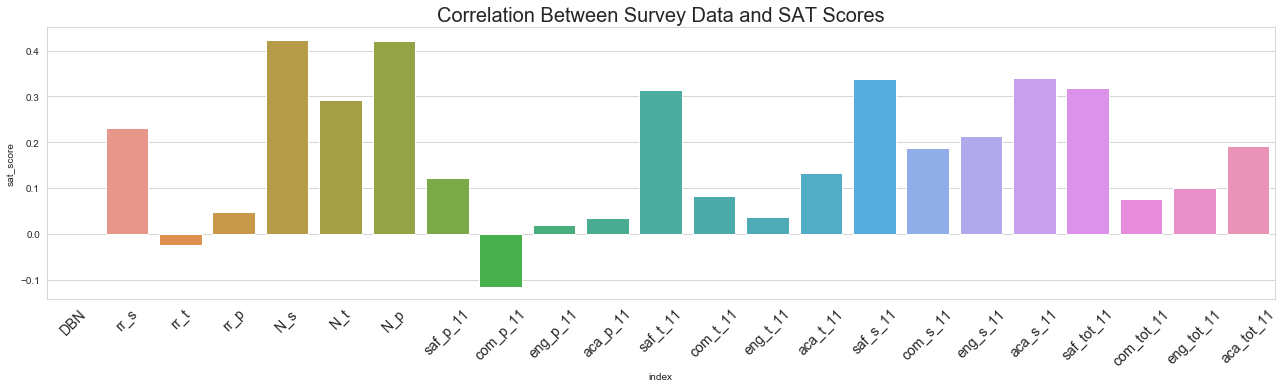

In [30]:
# create a bar plot with the correlations between the sat_score and the survey columns
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize = (22,5))
sns.barplot(data=sat_corr_survey, x='index', y='sat_score')
plt.xticks(fontsize=14, rotation=45)
plt.title('Correlation Between Survey Data and SAT Scores', fontsize=20)
plt.show()

In the graph above we see that some variables have a considerable correlation with sat_scores. The meaning of each column can be verified in this [dictionary](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8). 

The highest correlations are `N_s` and `N_p` representing the total number of students and parents per school, that is, larger schools are positively correlated with better students performance, shown before.

`saf_t_11` and `saf_s_11`, which measure how teachers and students perceive safety at school, also correlate positively with sat_score. Next, we will explore further the relationship between the perception of safety at school (`saf_t_11`) and SAT scores.

### Safety Perception and SAT Score

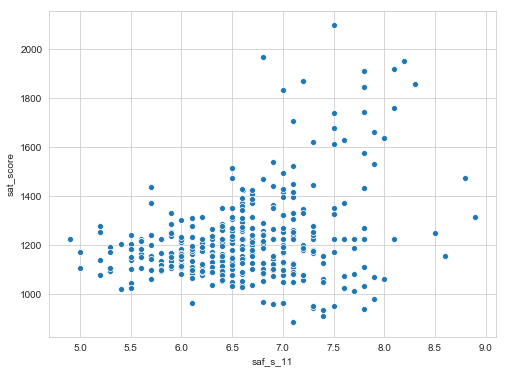

In [31]:
# Make a scatter plot of the saf_s_11 column vs. the sat_score in combined
plt.figure(figsize=(8,6))
sns.scatterplot(data=combined, x='saf_s_11', y='sat_score', palette='bright')
plt.show()

Analyzing the scatterplot above, we see that there seems to be a relationship between the perception of safety and academic performance. The relation is not very strong, but at large it seems that higher safety perception tends to be associated with higher scores. For example, if we take schools safety levels lowr than 6.5, there is very few schools with SAT scores higher than 1400. On the other hand, for schools with an average safety higher than 7.0 it is much easier to find SAT scores higher than 1600.

Let's aggregate schools by borough to check for differences in academic performance.

In [32]:
# compute average safety score for each borough
safety_borough = combined.groupby('borough')['saf_s_11'].agg(np.mean)
print(safety_borough)

borough
Bronx            6.606577
Brooklyn         6.370755
Manhattan        6.831370
Queens           6.721875
Staten Island    6.530000
Name: saf_s_11, dtype: float64


It seems Manhattan tends to have a slightly higher safety perception, while Brooklyn presents the lowest results. Next, we will analyze the correlation of gender and SAT scores.

### Gender and SAT Score

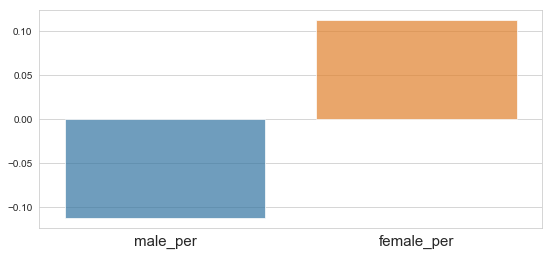

In [33]:
# plot the correlation between male and female percentages and SAT score
gender_corr = correlations.loc[['male_per', 'female_per']]
plt.figure(figsize=(9,4))
sns.barplot(gender_corr.index, gender_corr.values, alpha=0.7)
plt.xticks(fontsize=15)
plt.show()

Although correlations are not high, schools with a higher percentage of female students tend to have slightly better academic results, and schools with higher male percentage are a little more likely to have lower scores.

Let's build a scatterplot to better understand the relation between the percentage of female students and SAT scores.

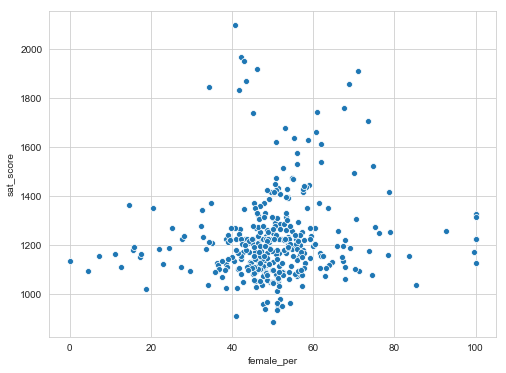

In [34]:
# show a scatterplot with female_per and sat_score
plt.figure(figsize=(8,6))
sns.scatterplot(data=combined, x='female_per', y='sat_score')
plt.show()

The scatter plot shows that there seems not to be a clear relationship between gender and academic performance. If we consider the percentage of females, there is a concentration of schools with higher scores for a percentage between 60% and 80%.

Let's pinpoint schools with a percentage of females that is higher than 60%.

In [35]:
# list schools with female percentage higher than 60% and scores higher than 1700
female_scores = combined[(combined['female_per'] > 60) & (combined['sat_score'] > 1700)]
print(female_scores['SCHOOL NAME'])

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


While analyzing the schools above, we see that they are often selective institutions that tend to invest on early preparation.


### AP Test Takers and SAT Results
In the U.S., high school students take Advanced Placement (AP) exams to earn college credit. There are AP exams for many different subjects.

It makes sense that the number of students at a school who took AP exams would be highly correlated with the school's SAT scores. Next, we will analyze the percentage of students taking AP exams and how that correlates with SAT scores.

In [36]:
# calculate the percentage of students per school who took an AP exam
combined['ap_per'] = combined['AP Test Takers '] / combined['total_enrollment']

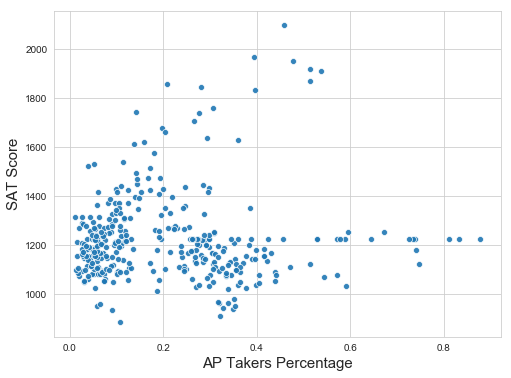

In [37]:
# make a scatter plot crossing ap_per and sat_score
%matplotlib inline
plt.figure(figsize=(8,6))
sns.scatterplot(data=combined, x='ap_per', y='sat_score', alpha=0.9)
plt.xlabel('AP Takers Percentage', fontsize=15)
plt.ylabel('SAT Score', fontsize=15)
plt.show()

Looking at the scatterplot above, we see that there seems to be some relationship between the AP test takers and SAT scores, but the relationship seems not to be strong, what is confirmed by the correlation calculated below.

In [38]:
# calculate the correlation between sat_score and AP Takers Percentage
corr = combined.corr()['sat_score']
corr.loc['ap_per']

0.05717081390766967

### Race and SAT Score

Next, we will calculate the correlation between race and SAT scores.

In [39]:
# calculate the correlation between sat_scores and the race percentage columns:
# white_per, asian_per, black_per, hispanic_per
race_cols = ['white_per', 'asian_per', 'black_per', 'hispanic_per']
race_corr = correlations.loc[race_cols]
race_corr.reset_index()
print(race_corr)

white_per       0.620718
asian_per       0.570730
black_per      -0.284139
hispanic_per   -0.396985
Name: sat_score, dtype: float64


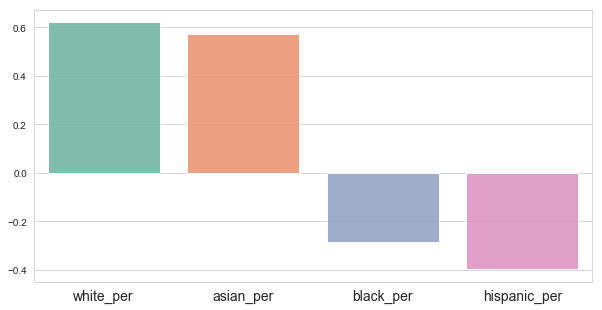

In [40]:
# make a bar plot of the race columns correlations with SAT scores
plt.figure(figsize=(10,5))
sns.barplot(x=race_corr.index, y=race_corr.values, alpha=0.9, palette="Set2")
plt.xticks(fontsize=14)
plt.show()

As we can observe above, there seems to be a strong correlation between race and SAT scores. For example, schools with a high percentage of white or asian students tend to have higher academic performance. The opposite happens for schools with high percentage of black or hispanic students.

### Hispanic Percent and SAT Score

Below, we further explor the relationship between a higher percentage of hispanic students and academic performance.

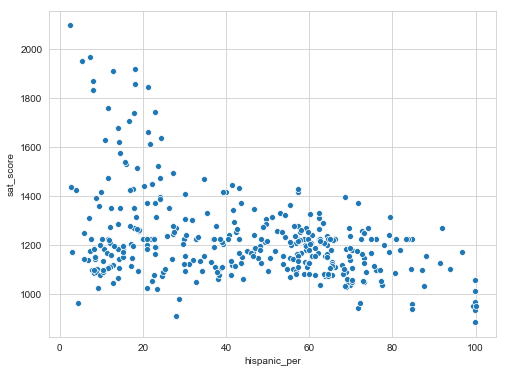

In [41]:
# show a scatter plot between hispanic_per and sat_score
plt.figure(figsize=(8,6))
sns.scatterplot(data=combined, y='sat_score', x='hispanic_per')
plt.show()

The scatter plot shows that in general a higher percentage of hispanic students seems to be linked to lower SAT scores, and vice versa. There seems to be a negative relationship between the two variables.

In [42]:
# display schools with more than 95% of hispanic students
hispanic_schools = combined[combined['hispanic_per'] > 95]['SCHOOL NAME']
print(hispanic_schools)

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


These schools seem to have a high percentage of recent immigrants to the US. Most likely they are still learning English what may be connected with lower SAT scores. Now let's focus on schools with a low percentage of hispanic students.

In [43]:
# identify schools with less than 10% of hispanic students and and SAT score average higher than 1800
low_hispanic = combined[(combined['hispanic_per'] < 10) & (combined['sat_score'] > 1800)]
low_hispanic['SCHOOL NAME']

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

When we consider schools with low percentage of hispanic students, we find mostly institutions devoted to technology and science.

This project shows that it is hard to correlate demographic variables and academic peformance, represented by SAT scores. Often, this variables may have high correlation with SAT scores, but not necessarity explain alone results.

One interesting result is the relationship between the perception of safety at school and acadeic performance. It seems hard for students in institutions they feel unsafe to concentrate and reach high scores.

Race correlations with SAT scores seem to be dependent on other characteristics. For example, the fact that schools with a high percentage of hispanic students tend to present lower schores seems to be related to the fact that these schools have students that are English learners, what would explain the lower scores. On the other hand, schools with lower percentage of hispanic students tend to be institutions with very high standards, devoted to technology and science.